In [1]:
# Standard library imports, and Visualization, Statistics, SciKit libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
%matplotlib inline

import sklearn
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # Transform dataset mean value and standard deviation
from sklearn import metrics

# Import Scipy Cluster
import scipy
from scipy.cluster.vq import whiten

# Import matplotlib for graphing plots and style to ggplot
import matplotlib as mpl

COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load churn dataset into a Pandas dataframe
churn_df = pd.read_csv('pca_prepared.csv')

In [3]:
# Display 10 selected features for PCA
features = (list(churn_df.columns[:-1]))
print('Selected PCA Features: \n', features)

Selected PCA Features: 
 ['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']


In [4]:
# Create matrix X
X = churn_df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

In [5]:
# Apply fit transform to StandardScaler 
X_standardized = StandardScaler().fit_transform(X)

In [6]:
# Initialize covariance matrix and display data
mean_vec = np.mean(X_standardized, axis=0)
covariance_matrix = (X_standardized - mean_vec).T.dot((X_standardized - mean_vec)) / (X_standardized.shape[0] - 1)

print('Covariance_Matrix: \n%s' %covariance_matrix)

Covariance_Matrix: 
[[ 1.00010001 -0.02973451  0.00994335  0.00188944  0.00447925 -0.02077811
   0.00732132 -0.00509183 -0.00978238  0.02558738]
 [-0.02973451  1.00010001 -0.00409101 -0.00804752  0.00158808  0.01506913
   0.00857821  0.01698097  0.01072958 -0.01472512]
 [ 0.00994335 -0.00409101  1.00010001 -0.01001155 -0.00926842  0.00123332
   0.00542382  0.00211458 -0.00301427  0.00367392]
 [ 0.00188944 -0.00804752 -0.01001155  1.00010001  0.00399413  0.01509319
   0.00290902  0.00293225  0.02049812  0.00417608]
 [ 0.00447925  0.00158808 -0.00926842  0.00399413  1.00010001  0.00304067
  -0.01635598 -0.01446932  0.00199675 -0.01458061]
 [-0.02077811  0.01506913  0.00123332  0.01509319  0.00304067  1.00010001
  -0.00603285  0.00282037  0.00425907  0.00329905]
 [ 0.00732132  0.00857821  0.00542382  0.00290902 -0.01635598 -0.00603285
   1.00010001  0.01243615 -0.00717299  0.0120349 ]
 [-0.00509183  0.01698097  0.00211458  0.00293225 -0.01446932  0.00282037
   0.01243615  1.00010001 -0.00

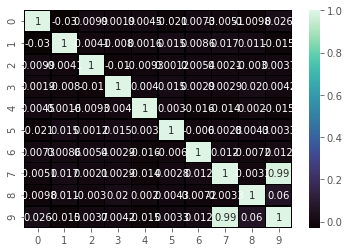

In [7]:
# Plot heatmap of covariance matrix
sns.heatmap(covariance_matrix, annot=True, cmap="mako", linecolor='black', linewidths=0.5)
plt.show()

In [8]:
# Calculate Eigen values and vectors on the covariance matrix
covariance_matrix = np.cov(X_standardized.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

# Display Calculations of Eigencomposition
print('Vectors: \n%s' %eigen_vectors)
print('Values: \n%s' %eigen_values)

Vectors: 
[[ 2.15854596e-02  1.41347924e-02 -5.59467157e-01 -2.82399326e-01
  -6.46748662e-01 -2.85318727e-01  1.41418217e-01 -2.87326245e-01
   5.77211536e-02  3.16792374e-02]
 [-2.23657297e-02  1.70801624e-03  4.79835590e-01 -5.78528649e-01
  -2.07964687e-01  4.21944284e-01 -8.98051752e-02 -4.05096045e-01
  -1.25005511e-01 -1.59620872e-01]
 [ 9.35369421e-04  4.35978315e-03 -2.23932319e-01 -9.07206677e-02
   3.02723086e-01  2.67257143e-01  1.66467676e-01 -2.94875246e-01
  -2.10454046e-01  7.87135785e-01]
 [-2.80743720e-04  5.88358241e-03  2.12259615e-01 -4.42194433e-01
   3.67329262e-01 -4.79537437e-01  5.78437841e-01  1.69773973e-03
   2.43383022e-01 -2.56863653e-02]
 [-2.46034405e-04 -2.07788587e-02  1.07066510e-01  2.05475213e-01
   2.29615135e-01 -4.38464782e-01 -4.54311812e-01 -6.86127907e-01
   1.53996990e-01 -4.96007075e-03]
 [ 9.42747188e-04  4.17502587e-03  4.58770120e-01  2.54312989e-01
  -4.38267152e-01  1.38442926e-02  1.04530277e-01  4.31843019e-02
   5.50932285e-01  4.65

In [9]:
# Sort Eigenvalues in descending value
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Display Eigenvalues
print('Values:')
for i in eigen_pairs:
    print(i[0])

Values:
1.9943331101364756
1.0533346256283744
1.0275539108057439
1.0125585769497123
0.9997955481739358
0.9937799880491779
0.9890585843412278
0.9647674706143197
0.9603505880456993
0.005467697265331362


In [10]:
# Fit features into standardized matrix using PCA library
pca = PCA().fit(X_standardized)

# Display PCA explained variance ratio
print(pca.explained_variance_ratio_)

[0.19941337 0.10532293 0.10274512 0.10124573 0.09996956 0.09936806
 0.09889597 0.0964671  0.09602546 0.00054672]


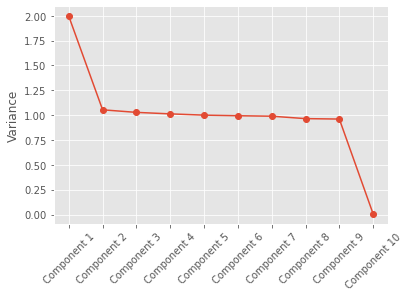

In [11]:
# Create Scree Plot of standardized values and display plot
def screeplot(pca, standardized_values):
    y = np.std(pca.transform(standardized_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ['Component ' + str(i) for i in x], rotation=45)
    plt.ylabel('Variance')
    plt.show()
    
screeplot(pca, X_standardized)

In [12]:
# Sort components in order of importance
def pca_summary(pca, standardized_data, out=True):
    names = ['PC ' + str(i) for i in range(1, len(pca.explained_variance_ratio_) + 1)]
    a = list(np.std(pca.transform(standardized_data), axis = 0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_) + 1)]
    columns = pd.MultiIndex.from_tuples([('standard_deviation', 'Standard Deviation'), 
                                         ('proportion_of_variation', 'Proportion of Variation'), 
                                         ('cumulative_proportion', 'Cumulative Proportion')])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print('Component importance:')
    return summary

# Print summary calculations
summary = pca_summary(pca, X_standardized)
summary.standard_deviation**2

Component importance:


,Standard Deviation
PC 1,1.994134
PC 2,1.053229
PC 3,1.027451
PC 4,1.012457
PC 5,0.999696
PC 6,0.993681
PC 7,0.988960
PC 8,0.964671
PC 9,0.960255
PC 10,0.005467


In [13]:
# Show Standard Deviation of total variance calculated by PCA
np.sum(summary.standard_deviation**2)

Standard Deviation    10.0
dtype: float64

In [14]:
# Show calculated variance captured by features/components
var = np.cumsum(np.round(summary, decimals=3)*100)

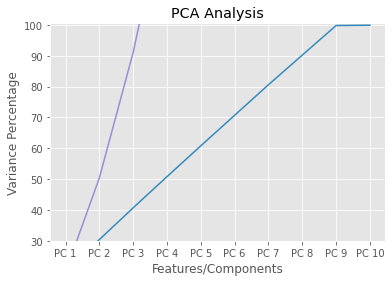

In [15]:
# Plot PCA Analysis
plt.ylabel('Variance Percentage')
plt.xlabel('Features/Components')
plt.title('PCA Analysis')
plt.ylim(30,100.5)

plt.plot(var)